In [25]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

import metapredict as meta
from housetools.interfaces.pdb import PDB

In [26]:
ex1='MATLEKLMKAFESLKSFQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQPPPPPPPPPPPQLPQPPPQAQPLLPQPQPPPPPPPPPP'

In [27]:
helicity = np.loadtxt('data/Q40_EX1_bcb74.result/DSSP_H.csv')

In [29]:
names = ['Q40_EX1_bcb74_unrelaxed_rank_1_model_3.pdb', 'Q40_EX1_bcb74_unrelaxed_rank_3_model_5.pdb', 'Q40_EX1_bcb74_unrelaxed_rank_5_model_2.pdb', 'Q40_EX1_bcb74_unrelaxed_rank_2_model_4.pdb', 'Q40_EX1_bcb74_unrelaxed_rank_4_model_1.pdb']

plddts = []
for n in names:
    x= [ r.b_factor for r in PDB(f'data/Q40_EX1_bcb74.result/{n}').chains[0].residues]
    
    plddts.append(x)

meta NOT subset; don't know how to subset; dropped


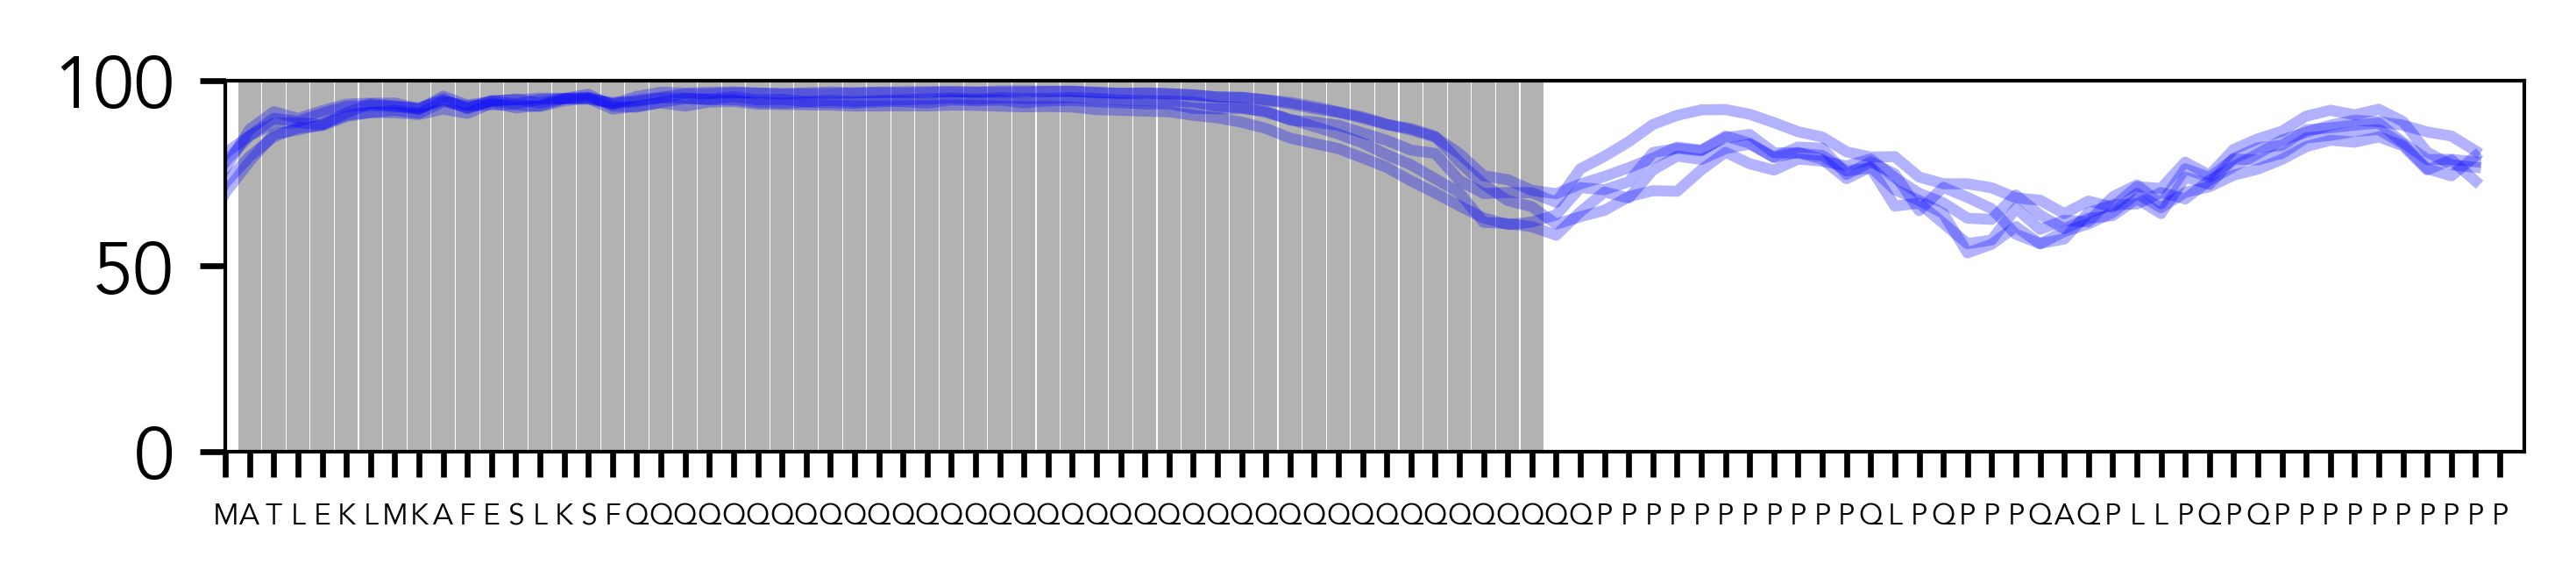

In [56]:
figure(num=None, figsize=(5, 1.3), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()


plt.plot(np.array(plddts).transpose(), color='b', alpha=0.3)
plt.ylim([0,100])

idx = np.arange(1,len(ex1)+1)

plt.bar(idx, np.array(helicity)*100, color='k', width=0.96, alpha=0.3)
plt.xlim([1,len(ex1)+1])
plt.tight_layout()
plt.xticks(idx, ex1, fontsize=4)
d=meta.predict_disorder_domains(ex1)
print()
plt.savefig('figures/ex1_plddt_dssp.pdf')

meta NOT subset; don't know how to subset; dropped


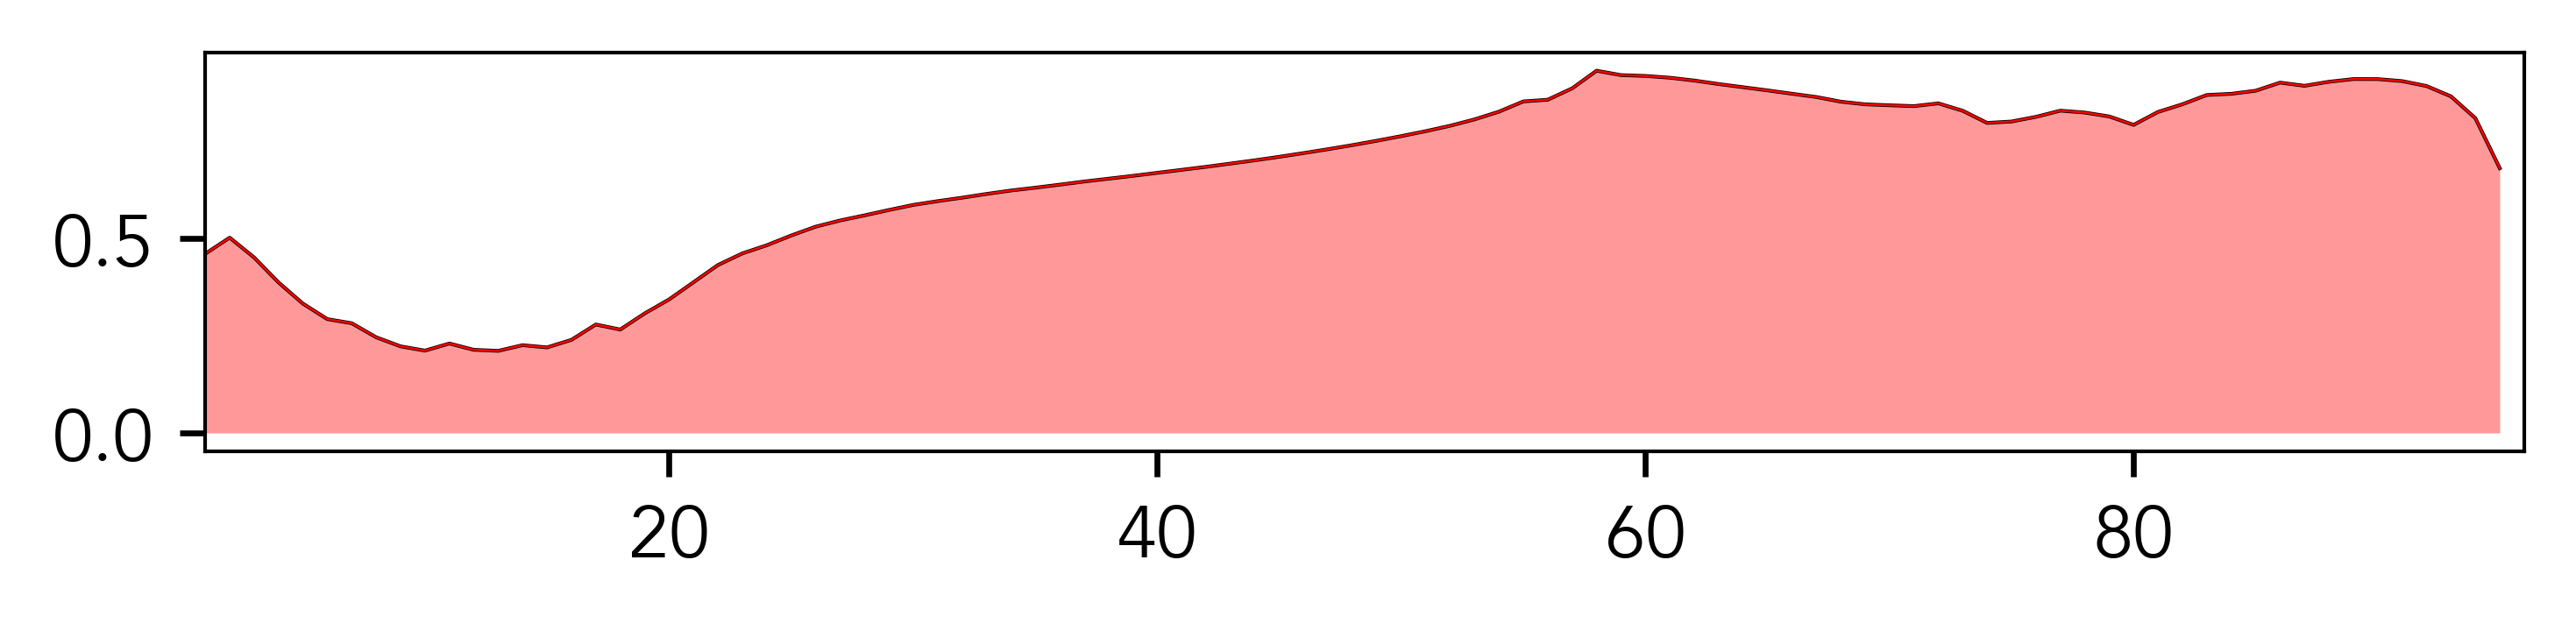

In [63]:
figure(num=None, figsize=(5, 1.3), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

d = meta.predict_disorder_domains(ex1)





idr_scores = d.disorder[d.disordered_domain_boundaries[0][0]:d.disordered_domain_boundaries[0][1]]
idr_idx = np.arange(1+d.disordered_domain_boundaries[0][0], d.disordered_domain_boundaries[0][1]+1)

plt.fill_between(idr_idx, idr_scores, color='r',alpha=0.4,linewidth=0)
plt.xlim([1,len(ex1)+1])

plt.plot(idx, d.disorder,'k',linewidth=0.5)
plt.plot(idx, d.disorder,'r',linewidth=0.3)

plt.tight_layout()
print()
plt.savefig('figures/ex1_disorder.pdf')

In [58]:
d.disordered_domain_boundaries[0]

[[0, 95]]